In [3]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random
from IPython.display import Image


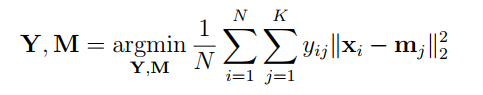

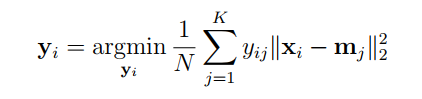

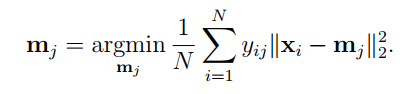

In [4]:
np.random.seed(18)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3 # 3 clusters
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [5]:
#initialize the centroids of clusters
def kmeans_init_centroids(X, k):
# randomly pick k rows of X as initial centroids
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [6]:
#assign label when knowing the clusters' centroids
def kmeans_assign_labels(X, centroids):
    # calculate pairwise distances btw data and centroids
    D = cdist(X, centroids)
    # return index of the closest centroid
    return np.argmin(D, axis = 1)

In [7]:
#check for stop condition of the algorithm
def has_converged(centroids, new_centroids):
    # return True if two sets of centroids are the same
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))

In [8]:
#update new centroids when knowing label of every point
def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
    # collect all points that are assigned to the k-th cluster
        Xk = X[labels == k, :]
        centroids[k,:] = np.mean(Xk, axis = 0) # take average
    return centroids

https://machinelearningcoban.com/assets/kmeans/kmeans_slowconverge.gif

In [9]:
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
    centroids.append(new_centroids)
    it += 1
    return (centroids, labels, it)

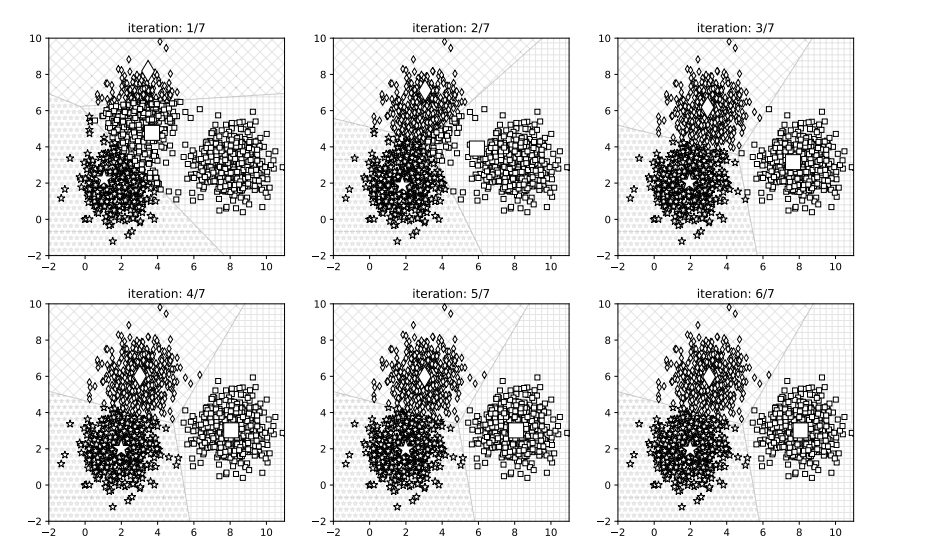

In [16]:
centroids, labels, it = kmeans(X, K)
print('Centers found by our algorithm:\n', centroids[-1])
kmeans_display(X, labels[-1])

In [11]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model.cluster_centers_)
pred_label = model.predict(X)


Centers found by scikit-learn:
[[3.02801296 5.96081708]
 [8.07476866 3.01494931]
 [1.98459808 1.96989964]]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
